In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
poltava1820 = pd.read_csv("Poltava2018-2020.csv")
print(poltava1820.head())

/Users/ruska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4,5,6,11,12,13,14,15,16,17,18,19,20,22,23,31,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,72,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                Record_ID  \
0  {3F60A2FA-92F5-4419-8137-6C023F74970B}   
1  {5966BAF6-523C-4949-B7DB-5D628B242C94}   
2  {9DA306D4-8C82-4409-990A-ADBD744BE59D}   
3  {00862DD8-A2C3-4AA3-BEC3-70719FDCFF76}   
4  {673E95CE-8EFB-4677-8227-E7E62BB8E1DE}   

                                            Hospital  Hospital_ID  \
0  КП "ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ" ...      1999388   
1  КНП "ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" З...      1999276   
2  КНП "МИРГОРОДСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ...      1999402   
3  КНП "ГРЕБІНКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ ...      1999253   
4  КП "ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ" ...      1999388   

     System_Input_Date       ID Patient_Gender           Birth_Date  \
0  2018-01-09 00:00:00  13429/8              2  1967-05-14 00:00:00   
1  2018-01-19 00:00:00     4151              1  2007-10-31 00:00:00   
2  2018-04-03 00:00:00    426/7              2  1931-09-05 00:00:00   
3  2018-05-21 00:00:00     31/

In [22]:
#This function transforms the dataframe into daily based time series dataframe based on hospitalization date (date 1)
# discharge date (date 2)
def df_to_days(df, idx, date1, date2):
    dfD = df.loc[:, [idx, date1, date2]]
    dfD[date1] = pd.to_datetime(dfD[date1])
    dfD[date2] = pd.to_datetime(dfD[date2])
    df2 = pd.melt(dfD, id_vars=idx, value_name='Date')
    df2.Date = pd.to_datetime(df2.Date)
    df2.set_index('Date', inplace=True)
    df2.drop('variable', axis=1, inplace=True)
    df3 = df2.groupby(idx).resample('D').ffill().reset_index(level=0, drop=True)
    df3 = df3.reset_index()
    df4 = pd.merge(dfD, df3)
    #print(df4.head())
    df5 = df4.merge(df, on = idx)
    return df5

In [7]:
poltava1820_heart = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I20-I25']

In [23]:
pdays_1820_heart = df_to_days(poltava1820_heart, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')

In [46]:
def count_hospitalizations(df, dlevel, idx, idu):
    if idu not in df.columns:
        df = df.reset_index()
        idu = 'level_0'
    df = df[df['Date'] >= '2018-1-1']
    df = df[df['Date'] < '2021-1-1']
    df = df[df['Days_In_Hospital'] <= 50]
    df_M = df.groupby([pd.Grouper(key = 'Date', freq='M'), dlevel, idx])[idu].count()
    df_M = df_M.reset_index()
    df_M_cases = df_M.groupby('Date').agg({idx: 'count', idu: 'sum'})
    df_M_cases = df_M_cases.rename(columns={idx :'number of admissions', idu: 'number of days of care'})
    return df_M_cases

    

In [39]:
pdays_1820_heart_cases = count_hospitalizations(pdays_1820_heart, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_heart_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2525                   19768
2018-02-28                  2535                   19740
2018-03-31                  2719                   20624
2018-04-30                  2634                   20488
2018-05-31                  2501                   19836
2018-06-30                  2267                   17865
2018-07-31                  2072                   16019
2018-08-31                  1994                   15567
2018-09-30                  2087                   16538
2018-10-31                  2787                   21814
2018-11-30                  2760                   21634
2018-12-31                  2337                   18805
2019-01-31                  2376                   18979
2019-02-28                  2577                   19240
2019-03-31                  2790                   21913
2019-04-30                  239

In [40]:
pdays_1820_heart_cases = pdays_1820_heart_cases.reset_index()

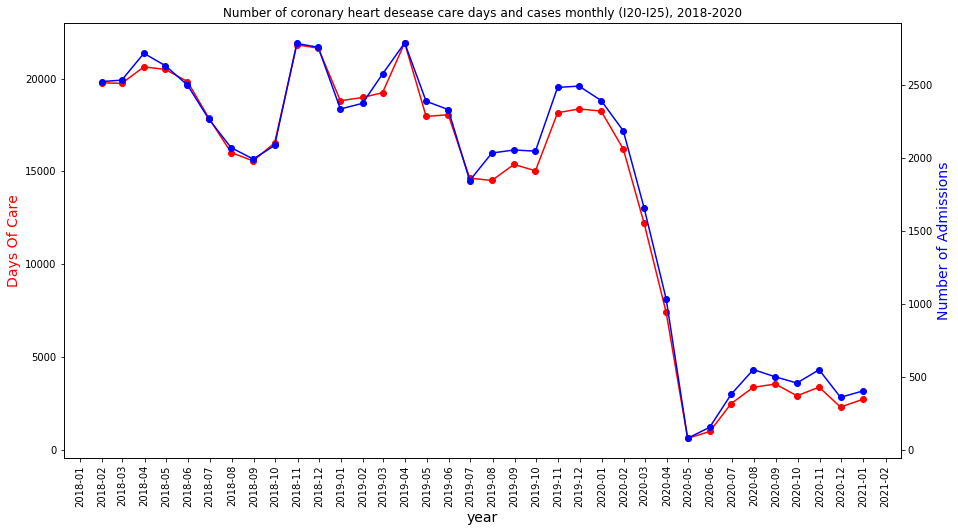

In [43]:
x = pdays_1820_heart_cases['Date']
y = pdays_1820_heart_cases['number of days of care']
z = pdays_1820_heart_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="red", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="red",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="blue",marker="o")
ax2.set_ylabel("Number of Admissions",color="blue",fontsize=14)
plt.title('Number of coronary heart desease care days and cases monthly (I20-I25), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Heart_Desease_18_20.png')
plt.show()

In [47]:
poltava1820_stroke = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I60-I69']
pdays_1820_stroke = df_to_days(poltava1820_stroke, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_stroke_cases = count_hospitalizations(pdays_1820_stroke, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_stroke_cases)



            number of admissions  number of days of care
Date                                                    
2018-01-31                  1499                   12514
2018-02-28                  1514                   12227
2018-03-31                  1653                   13754
2018-04-30                  1604                   13272
2018-05-31                  1714                   14334
2018-06-30                  1505                   12747
2018-07-31                  1405                   12009
2018-08-31                  1412                   11528
2018-09-30                  1464                   12190
2018-10-31                  1622                   13357
2018-11-30                  1770                   14088
2018-12-31                  1511                   13016
2019-01-31                  1414                   11701
2019-02-28                  1535                   11553
2019-03-31                  1627                   13090
2019-04-30                  155

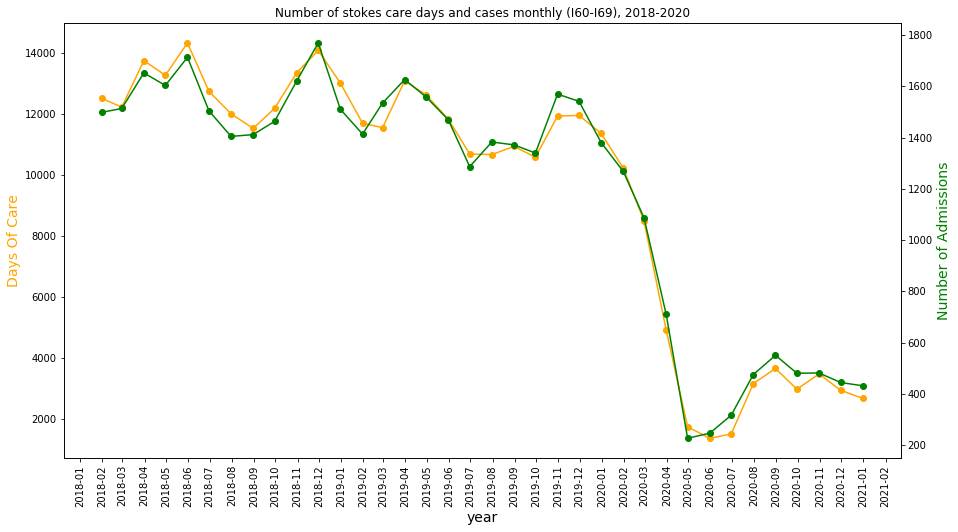

In [48]:
pdays_1820_stroke_cases = pdays_1820_stroke_cases.reset_index()
x = pdays_1820_stroke_cases['Date']
y = pdays_1820_stroke_cases['number of days of care']
z = pdays_1820_stroke_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="orange", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="orange",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="green",marker="o")
ax2.set_ylabel("Number of Admissions",color="green",fontsize=14)
plt.title('Number of stokes care days and cases monthly (I60-I69), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_Stroke_Desease_18_20.png')
plt.show()

In [49]:
poltava1820_infarction = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'I21']
pdays_1820_infarction = df_to_days(poltava1820_infarction, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_infarction_cases = count_hospitalizations(pdays_1820_infarction, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_infarction_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   138                     997
2018-02-28                   104                     940
2018-03-31                   120                     885
2018-04-30                   154                    1333
2018-05-31                   156                    1268
2018-06-30                   150                    1290
2018-07-31                   135                    1131
2018-08-31                   122                     996
2018-09-30                   121                    1061
2018-10-31                   156                    1268
2018-11-30                   158                    1476
2018-12-31                   144                    1259
2019-01-31                   123                    1133
2019-02-28                   115                     979
2019-03-31                   144                    1430
2019-04-30                   15

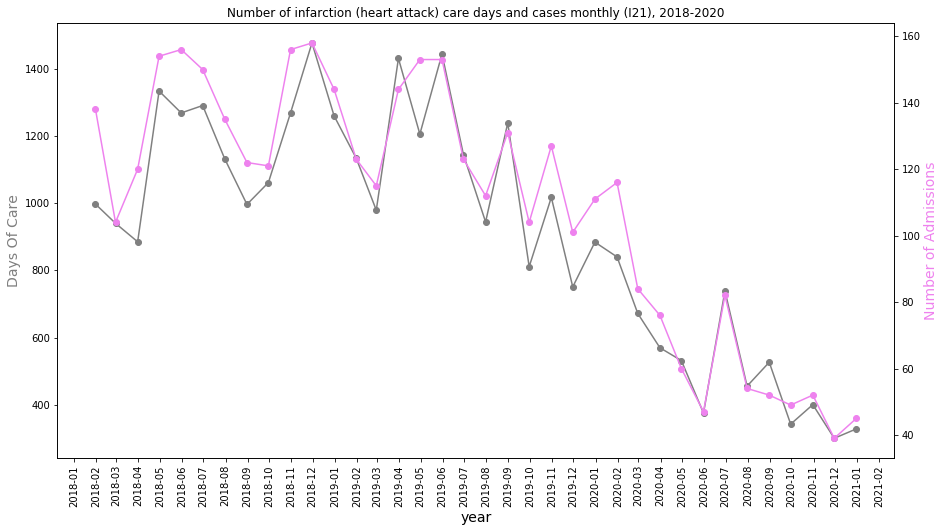

In [50]:
pdays_1820_infarction_cases = pdays_1820_infarction_cases.reset_index()
x = pdays_1820_infarction_cases['Date']
y = pdays_1820_infarction_cases['number of days of care']
z = pdays_1820_infarction_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="grey", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="grey",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="violet",marker="o")
ax2.set_ylabel("Number of Admissions",color="violet",fontsize=14)
plt.title('Number of infarction (heart attack) care days and cases monthly (I21), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_infarction_Desease_18_20.png')
plt.show()

In [51]:
poltava1820_pulmonaryembolism = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I26-I28']
pdays_1820_pulmonaryembolism = df_to_days(poltava1820_pulmonaryembolism, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_pulmonaryembolism_cases = count_hospitalizations(pdays_1820_pulmonaryembolism, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_pulmonaryembolism_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                    16                     105
2018-02-28                    10                      93
2018-03-31                    17                     118
2018-04-30                    17                     136
2018-05-31                    17                      85
2018-06-30                    10                     120
2018-07-31                     8                      62
2018-08-31                    11                      84
2018-09-30                    11                     117
2018-10-31                    20                     164
2018-11-30                    14                      99
2018-12-31                    23                     244
2019-01-31                    19                     119
2019-02-28                    16                     190
2019-03-31                    19                     211
2019-04-30                    2

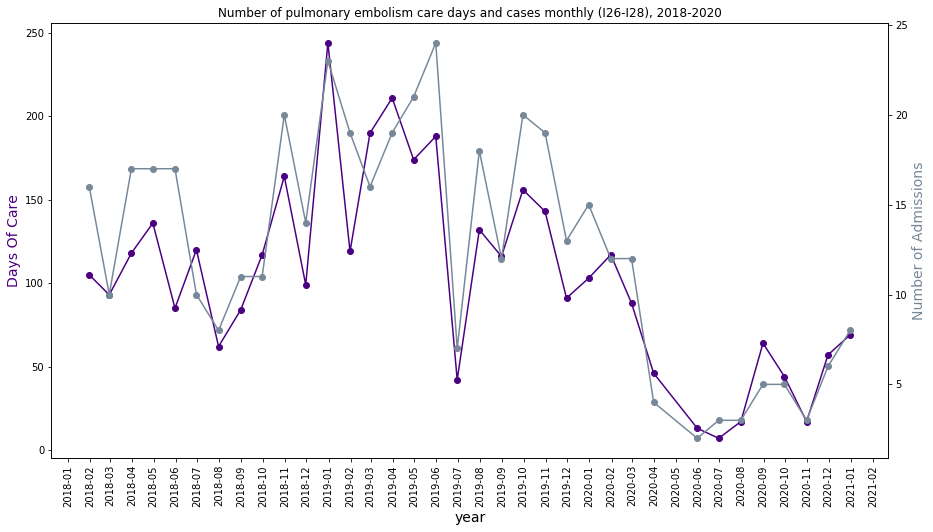

In [52]:
pdays_1820_pulmonaryembolism_cases = pdays_1820_pulmonaryembolism_cases.reset_index()
x = pdays_1820_pulmonaryembolism_cases['Date']
y = pdays_1820_pulmonaryembolism_cases['number of days of care']
z = pdays_1820_pulmonaryembolism_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="indigo", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="indigo",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="lightslategray",marker="o")
ax2.set_ylabel("Number of Admissions",color="lightslategray",fontsize=14)
plt.title('Number of pulmonary embolism care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_pulmonaryembolism_Desease_18_20.png')
plt.show()

In [57]:
poltava1820_flupneumonia = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'J10-J18']
poltava1820_flupneumonia = poltava1820_flupneumonia.reset_index()
poltava1820_flupneumonia['Record_ID2'] = poltava1820_flupneumonia["Record_ID"].astype(str) + "_" + poltava1820_flupneumonia["level_0"].astype(str)

In [60]:
pdays_1820_flupneumonia = df_to_days(poltava1820_flupneumonia, 'Record_ID2', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_flupneumonia_cases = count_hospitalizations(pdays_1820_flupneumonia, 'Main_Diagnosis_L2', 'Record_ID2', 'level_0')
print(pdays_1820_flupneumonia_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  1503                   13307
2018-02-28                  1505                   12714
2018-03-31                  1503                   13022
2018-04-30                  1013                    8810
2018-05-31                   842                    7522
2018-06-30                   712                    6324
2018-07-31                   604                    5307
2018-08-31                   711                    5943
2018-09-30                   734                    6585
2018-10-31                   975                    8411
2018-11-30                  1223                   10144
2018-12-31                  1900                   16351
2019-01-31                  1853                   16134
2019-02-28                  1236                   10091
2019-03-31                  1354                   11403
2019-04-30                  134

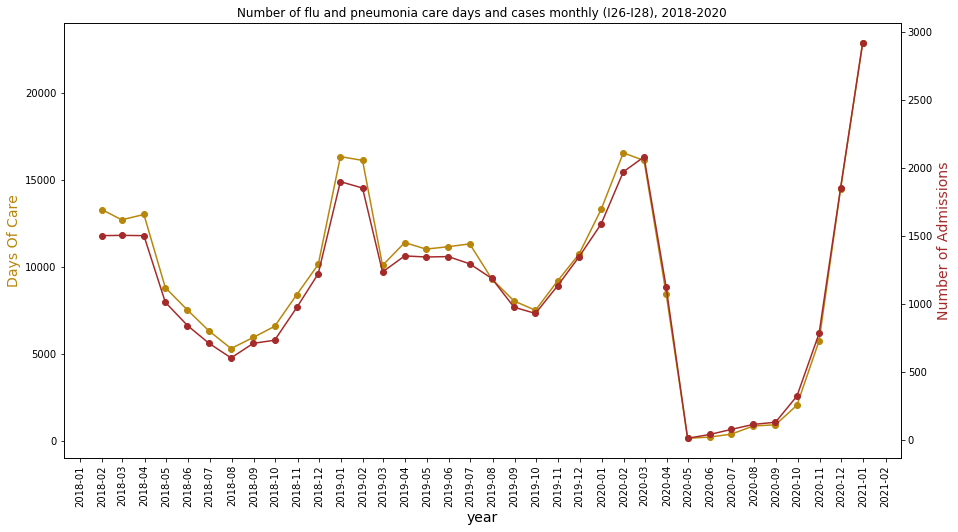

In [96]:
pdays_1820_flupneumonia_cases = pdays_1820_flupneumonia_cases.reset_index()
x = pdays_1820_flupneumonia_cases['Date']
y = pdays_1820_flupneumonia_cases['number of days of care']
z = pdays_1820_flupneumonia_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="darkgoldenrod", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="darkgoldenrod",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="brown",marker="o")
ax2.set_ylabel("Number of Admissions",color="brown",fontsize=14)
plt.title('Number of flu and pneumonia care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_flupneumonia_Desease_18_20.png')
plt.show()

In [63]:
poltava1820_corona = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'U07']
#poltava1820_corona = poltava1820_flupneumonia.reset_index()
#poltava1820_corona['Record_ID2'] = poltava1820_corona["Record_ID"].astype(str) + "_" + poltava1820_flupneumonia["level_0"].astype(str)

In [64]:
poltava1820_corona = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'U07']
pdays_1820_corona = df_to_days(poltava1820_corona, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_corona_cases = count_hospitalizations(pdays_1820_corona, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_corona_cases)

            number of admissions  number of days of care
Date                                                    
2020-04-30                     1                      16
2020-06-30                     1                      17
2020-07-31                     2                      15
2020-08-31                    10                      62
2020-09-30                    85                     548
2020-10-31                   362                    2937
2020-11-30                   566                    4241
2020-12-31                   690                    5025


In [65]:
pdays_1820_corona_cases = pdays_1820_corona_cases.reset_index()

In [79]:
pdays_pneu_corona = pdays_1820_flupneumonia_cases.merge(pdays_1820_corona_cases, on = 'Date', how = 'left')
pdays_pneu_corona = pdays_pneu_corona.fillna(0)
pdays_pneu_corona = pdays_pneu_corona.rename(columns={'number_of_admissions_x' :'number of admissions pneumonia', 'number_of_admissions_y': 'number_of_admissions_corona'})

In [80]:
pdays_pneu_corona = pdays_pneu_corona.rename(columns={'number of admissions_x' :'number of admissions pneumonia', 'number of admissions_y': 'number of admissions corona'})
pdays_pneu_corona

,Date,number of admissions pneumonia,number of days of care_x,number of admissions corona,number of days of care_y
0,2018-01-31,1503,13307,0.0,0.0
1,2018-02-28,1505,12714,0.0,0.0
2,2018-03-31,1503,13022,0.0,0.0
3,2018-04-30,1013,8810,0.0,0.0
4,2018-05-31,842,7522,0.0,0.0
5,2018-06-30,712,6324,0.0,0.0
6,2018-07-31,604,5307,0.0,0.0
7,2018-08-31,711,5943,0.0,0.0
8,2018-09-30,734,6585,0.0,0.0
9,2018-10-31,975,8411,0.0,0.0


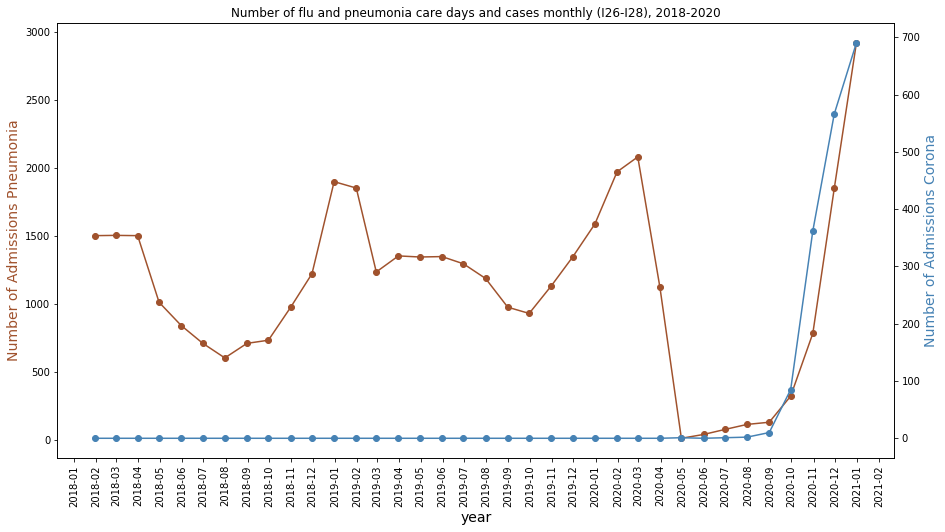

In [97]:
#pdays_pneu_corona = pdays_pneu_corona.reset_index()
x = pdays_pneu_corona['Date']
y = pdays_pneu_corona['number of admissions pneumonia']
z = pdays_pneu_corona['number of admissions corona']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="sienna", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Number of Admissions Pneumonia",color="sienna",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="steelblue",marker="o")
ax2.set_ylabel("Number of Admissions Corona",color="steelblue",fontsize=14)
plt.title('Number of flu and pneumonia care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_flupneumonia_corona18_20.png')
plt.show()

In [90]:
poltava1820_cold = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'J00-J06']
poltava1820_cold = poltava1820_cold.reset_index()
poltava1820_cold['Record_ID2'] = poltava1820_cold["Record_ID"].astype(str) + "_" + poltava1820_cold["level_0"].astype(str)
pdays_1820_cold = df_to_days(poltava1820_cold, 'Record_ID2', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_cold_cases = count_hospitalizations(pdays_1820_cold, 'Main_Diagnosis_L2', 'Record_ID2', 'level_0')
print(pdays_1820_cold_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2052                   13352
2018-02-28                  2158                   13692
2018-03-31                  2155                   14004
2018-04-30                  1541                    9943
2018-05-31                  1347                    8677
2018-06-30                  1270                    8249
2018-07-31                  1306                    8652
2018-08-31                  1459                    9413
2018-09-30                  1534                    9928
2018-10-31                  1731                   11453
2018-11-30                  1655                   10837
2018-12-31                  2268                   15215
2019-01-31                  1900                   13073
2019-02-28                  1546                   10260
2019-03-31                  1686                   11317
2019-04-30                  149

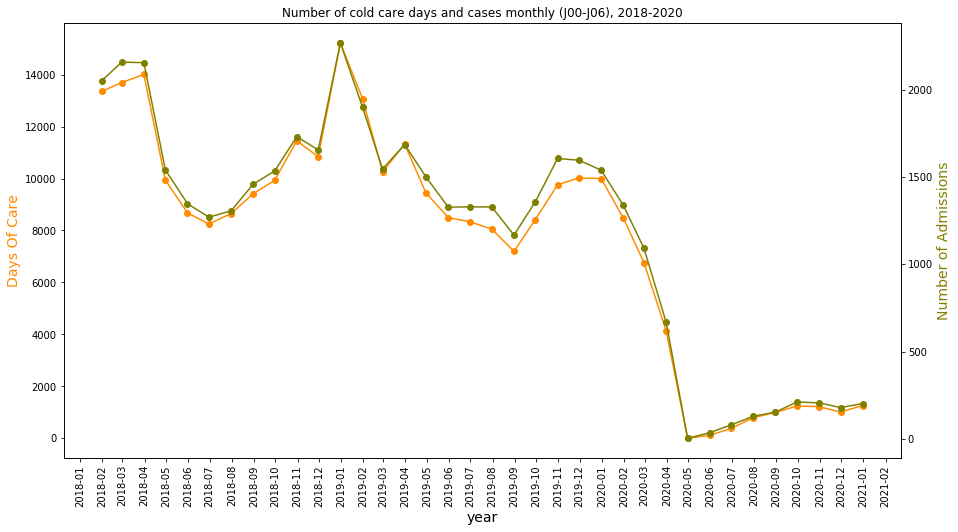

In [99]:
pdays_1820_cold_cases = pdays_1820_cold_cases.reset_index()
x = pdays_1820_cold_cases['Date']
y = pdays_1820_cold_cases['number of days of care']
z = pdays_1820_cold_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="darkorange", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="darkorange",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="olive",marker="o")
ax2.set_ylabel("Number of Admissions",color="olive",fontsize=14)
plt.title('Number of cold care days and cases monthly (J00-J06), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Cold_18_20.png')
plt.show()

In [84]:
poltava1820_childbirthcomplications = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'O60-O75']
pdays_1820_childbirthcomplications = df_to_days(poltava1820_childbirthcomplications, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_childbirthcomplications_cases = count_hospitalizations(pdays_1820_childbirthcomplications, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_childbirthcomplications_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   178                    1222
2018-02-28                   127                     928
2018-03-31                   143                    1031
2018-04-30                   141                     944
2018-05-31                   173                    1301
2018-06-30                   151                     966
2018-07-31                   141                     911
2018-08-31                   138                     979
2018-09-30                   140                    1040
2018-10-31                   150                     949
2018-11-30                   157                    1110
2018-12-31                   150                    1167
2019-01-31                   168                    1231
2019-02-28                   181                    1212
2019-03-31                   211                    1415
2019-04-30                   17

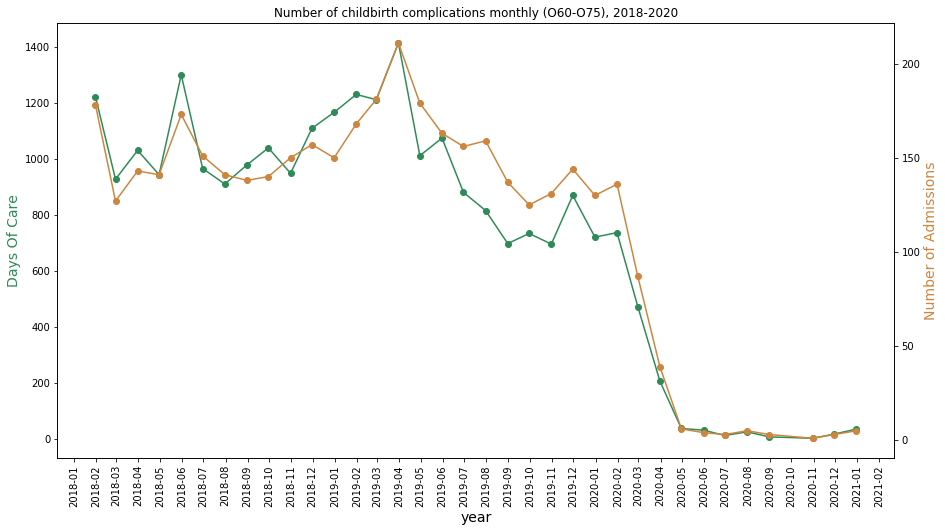

In [87]:
pdays_1820_childbirthcomplications_cases = pdays_1820_childbirthcomplications_cases.reset_index()
x = pdays_1820_childbirthcomplications_cases['Date']
y = pdays_1820_childbirthcomplications_cases['number of days of care']
z = pdays_1820_childbirthcomplications_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="seagreen", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="seagreen",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="peru",marker="o")
ax2.set_ylabel("Number of Admissions",color="peru",fontsize=14)
plt.title('Number of childbirth complications monthly (O60-O75), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_childbirthcomplications_Desease_18_20.png')
plt.show()

In [86]:
poltava1820_stomachdisease = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'K20-K31']
pdays_1820_stomachdisease = df_to_days(poltava1820_stomachdisease, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_stomachdisease_cases = count_hospitalizations(pdays_1820_stomachdisease, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_stomachdisease_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   686                    5169
2018-02-28                   723                    5059
2018-03-31                   729                    5317
2018-04-30                   608                    4389
2018-05-31                   639                    4800
2018-06-30                   606                    4186
2018-07-31                   627                    4689
2018-08-31                   665                    4903
2018-09-30                   578                    4245
2018-10-31                   637                    4512
2018-11-30                   618                    4616
2018-12-31                   602                    4937
2019-01-31                   534                    3777
2019-02-28                   579                    4183
2019-03-31                   610                    4352
2019-04-30                   56

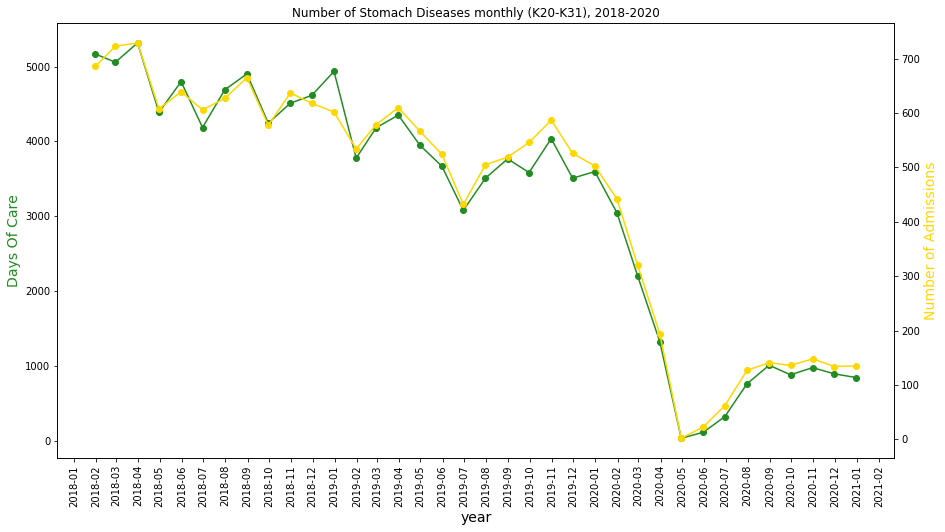

In [100]:
pdays_1820_stomachdisease_cases = pdays_1820_stomachdisease_cases.reset_index()
x = pdays_1820_stomachdisease_cases['Date']
y = pdays_1820_stomachdisease_cases['number of days of care']
z = pdays_1820_stomachdisease_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="forestgreen", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="forestgreen",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="gold",marker="o")
ax2.set_ylabel("Number of Admissions",color="gold",fontsize=14)
plt.title('Number of Stomach Diseases monthly (K20-K31), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Stomachdisease_Desease_18_20.png')
plt.show()

In [93]:
poltava1820_tumor = poltava1820[poltava1820['Main_Diagnosis_L1'] == 'C00-D48']
pdays_1820_tumor = df_to_days(poltava1820_tumor, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_tumor_cases = count_hospitalizations(pdays_1820_tumor, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_tumor_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  1026                    8053
2018-02-28                  1097                    7974
2018-03-31                  1153                    8505
2018-04-30                  1040                    7916
2018-05-31                  1057                    8003
2018-06-30                   959                    7310
2018-07-31                   978                    7399
2018-08-31                   980                    7693
2018-09-30                   889                    7043
2018-10-31                  1022                    7808
2018-11-30                  1084                    8241
2018-12-31                   946                    7927
2019-01-31                   969                    7471
2019-02-28                  1096                    8111
2019-03-31                  1107                    8605
2019-04-30                  105

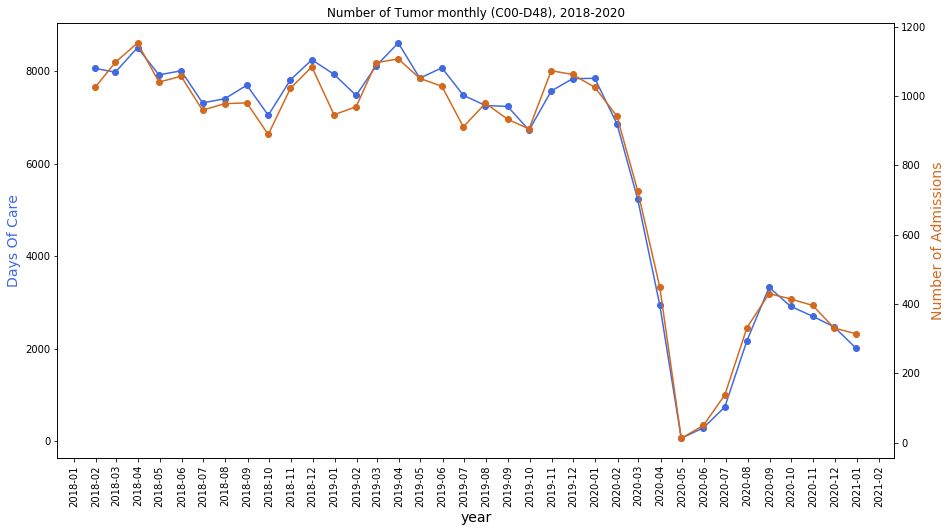

In [98]:
pdays_1820_tumor_cases = pdays_1820_tumor_cases.reset_index()
x = pdays_1820_tumor_cases['Date']
y = pdays_1820_tumor_cases['number of days of care']
z = pdays_1820_tumor_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="royalblue", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="royalblue",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="chocolate",marker="o")
ax2.set_ylabel("Number of Admissions",color="chocolate",fontsize=14)
plt.title('Number of Tumor monthly (C00-D48), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_tumor_Desease_18_20.png')
plt.show()

In [101]:
poltava1820_heart = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I20-I25']

In [103]:
#df[~df.country.isin(countries_to_keep)]
hospitals_not_in_20_4 = [2008968, 1999537, 1999520, 26435008, 13961403]
poltava1820_heart_hospitals_corr = poltava1820_heart[~poltava1820_heart['Hospital_ID'].isin(hospitals_not_in_20_4)]
print(poltava1820_heart.shape)
print(poltava1820_heart_hospitals_corr.shape)

(51453, 81)
(49786, 81)


In [104]:
pdays_1820_heart_hospitals_corr = df_to_days(poltava1820_heart_hospitals_corr, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')

    

pdays_1820_heart_hospitals_corr_cases = count_hospitalizations(pdays_1820_heart_hospitals_corr, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_heart_hospitals_corr_cases)

pdays_1820_heart_hospitals_corr_cases = pdays_1820_heart_hospitals_corr_cases.reset_index()

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2433                   18965
2018-02-28                  2451                   19075
2018-03-31                  2621                   19804
2018-04-30                  2535                   19643
2018-05-31                  2411                   19052
2018-06-30                  2187                   17243
2018-07-31                  1993                   15323
2018-08-31                  1926                   15081
2018-09-30                  2018                   15966
2018-10-31                  2691                   20948
2018-11-30                  2658                   20839
2018-12-31                  2251                   18012
2019-01-31                  2285                   18225
2019-02-28                  2458                   18255
2019-03-31                  2686                   21049
2019-04-30                  229

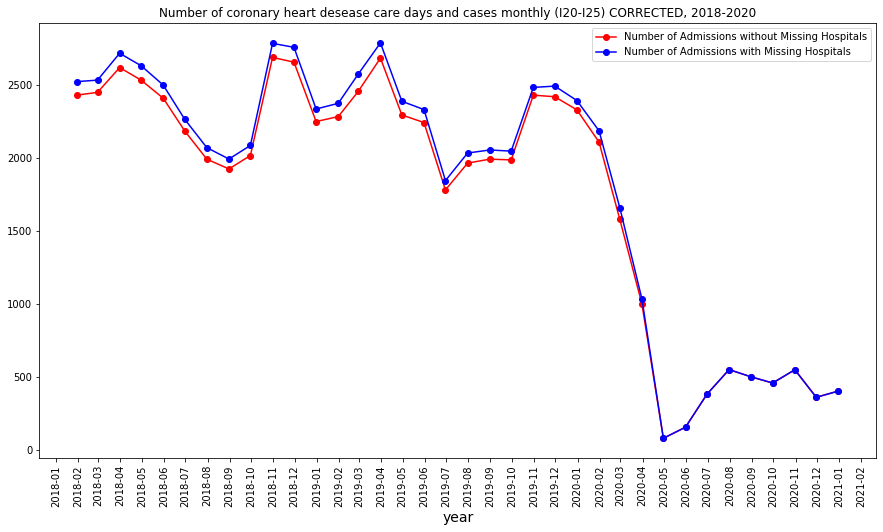

In [110]:


x = pdays_1820_heart_cases['Date']
y = pdays_1820_heart_hospitals_corr_cases['number of admissions']
z = pdays_1820_heart_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="red", marker="o")

ax.set_xlabel("year",fontsize=14)

#ax.legend(["Number of Admissions without Missing Hospitals"])
#ax.set_ylabel("Number of Admissions without Missing Hospitals",color="red",fontsize=14)

#ax2=ax.twinx()

ax.plot(x, z,color="blue",marker="o")
ax.legend(["Number of Admissions without Missing Hospitals", "Number of Admissions with Missing Hospitals"])
#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
plt.title('Number of coronary heart desease care days and cases monthly (I20-I25) CORRECTED, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Heart_Desease_Corrected_18_20.png')
plt.show()